In [18]:
import pandas as pd
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
df= pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [23]:
X= df.drop(columns='Survived')
y=df['Survived'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [26]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [32]:
#Dense specifies densly connected

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

model.add(Dense(11,activation="sigmoid",input_dim=11)) #first hidden layer
model.add(Dense(11,activation="sigmoid")) #second hidden layer
model.add(Dense(10,activation="sigmoid")) #third hidden layer
model.add(Dense(1,activation='sigmoid')) #output layer

c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           715 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,554 (6.07 KB)

 Trainable params: 1,554 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history= model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6344 - loss: 0.6599 - val_accuracy: 0.5455 - val_loss: 0.7190
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6344 - loss: 0.6582 - val_accuracy: 0.5455 - val_loss: 0.7114
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.6569 - val_accuracy: 0.5455 - val_loss: 0.7091
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.6569 - val_accuracy: 0.5455 - val_loss: 0.7062
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.6566 - val_accuracy: 0.5455 - val_loss: 0.7062
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.6566 - val_accuracy: 0.5455 - val_loss: 0.7058
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.6572 - val_accuracy: 0.5455 - val_loss: 0.7035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6344 - loss: 0.6567 - val_accuracy: 0.5455 - val_l

In [36]:
y_pred=model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.36636463],
       [0.366

In [37]:
y_pred=y_pred.argmax(axis=1)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

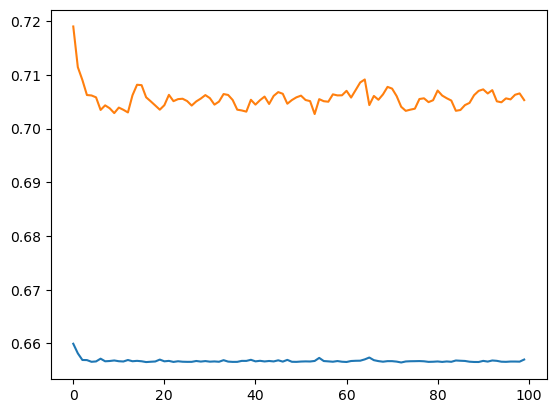

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

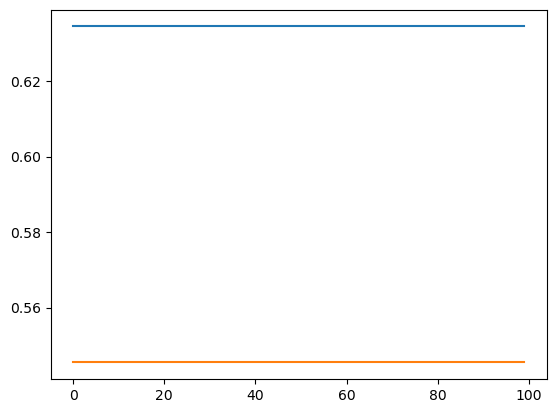

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])